In [9]:
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95], random_state=42)

In [10]:
unique, counts = np.unique(y, return_counts=True)

In [13]:
print(np.asarray((unique, counts)).T)

[[   0 9461]
 [   1  539]]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [17]:
svm_model = SVC(kernel = 'linear', C = 1)

In [18]:
svm_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [19]:
y_pred = svm_model.predict(x_test)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.99


In [27]:
scores = cross_val_score(svm_model, x, y, cv = 10)
print("K-fold cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

K-fold cross validation accuracy: 0.99 (+/- 0.00)


In [28]:
len(y_test)

3000

In [32]:
y_pred_dummymodel = np.tile(0, 3000)

In [35]:
print('Accuracy:', accuracy_score(y_test, y_pred_dummymodel))

Accuracy: 0.939


In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [52]:
y_scores = cross_val_predict(svm_model, x_train, y_train, cv=3,
                             method="decision_function")

In [55]:
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

In [56]:
import matplotlib.pyplot as plt

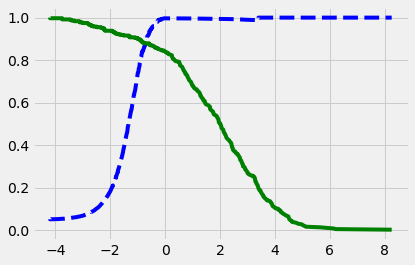

In [59]:
plt.style.use('fivethirtyeight')
plt.plot(thresholds, precision[:-1], "b--")
plt.plot(thresholds, recall[:-1], "g-")
plt.show()

In [60]:
from sklearn.metrics import f1_score

In [61]:
f1_score(y_test, y_pred)

0.9112426035502958

In [62]:
from sklearn.linear_model import SGDClassifier

In [70]:
SGD_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)

In [71]:
SGD_model.fit(x_train, y_train)

SGDClassifier(max_iter=20)

In [72]:
y_pred2 = SGD_model.predict(x_test)

In [73]:
f1_score(y_test, y_pred2)

0.923076923076923

In [83]:
x1 = x_test[0]

In [85]:
x1 = x1.reshape(1, -1)

In [86]:
SGD_model.decision_function(x1)

array([-2.27684681])

In [88]:
from sklearn.metrics import roc_curve

In [89]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

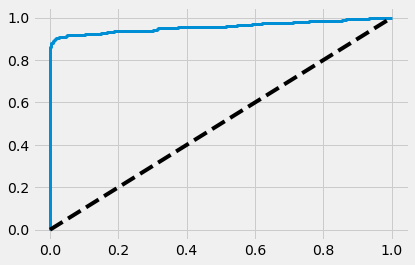

In [90]:
plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(y_train, y_scores)

0.9579700194143234